<div style="background: #e63946; padding: 1rem 0rem; font-size:1.2rem; font-weight: bold; text-align: center; color: #fdf0d5; border-radius: 0.8rem;">
    <h3>Student Academic Data - Exploratory Data Analysis (EDA)</h3>
    Exploring Academic Choices and Trends in Student General Degree College Data
</div>

<div style="background: #e63946; padding: 1rem 0rem; font-size:1.5rem; font-weight: bold; text-align: center; color: #fdf0d5; border-radius: 0.8rem;">
    Data Cleaning
</div>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Student Degree College Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(5143, 13)

In [4]:
df.head()

,form_no,name,category,minority,gender,hs_total,hs_pass_year,first_choice_sub,first_choice_marks,second_choice_sub,second_choice_marks,first_choice_stream,second_choice_stream
0,1801371,Susmita Bhowmik,UR,NO,F,381,2018,Mathematics,80,Mathematics,80,Physical Science,Physical Science
1,1803096,Ankur Das,SC,NO,M,262,2018,Education,61,Bengali,58,Arts,Arts
2,1801287,Rashmita Tanti,UR,NO,M,278,2018,Human Physiology,74,Botany,74,Bio Science,Bio Science
3,1803173,Sanjib Ghosh,UR,NO,M,194,2018,NaN,0,NaN,0,Arts,Arts
4,1801077,Swarupa Pal,UR,NO,F,320,2015,NaN,0,NaN,0,Bio Science,Bio Science


In [5]:
pd.isnull(df).sum()

form_no                    0
name                       0
category                   0
minority                   0
gender                     0
hs_total                   0
hs_pass_year               0
first_choice_sub        1541
first_choice_marks         0
second_choice_sub       1541
second_choice_marks        0
first_choice_stream        0
second_choice_stream       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.rename(columns={'form_no':'Form No.','name':'Name','category':'Category','minority':'Minority','gender':'Gender',
                   'hs_total':'High School Total Marks','hs_pass_year':'High School Passout Year','first_choice_sub':'1st Subject',
                   'first_choice_marks':'1st Subject Marks','second_choice_sub':'2nd Subject',
                   'second_choice_marks':'2nd Subject Marks','first_choice_stream':'1st Stream','second_choice_stream':'2nd Stream'}, inplace=True)

In [8]:
df.isnull().sum()

Form No.                    0
Name                        0
Category                    0
Minority                    0
Gender                      0
High School Total Marks     0
High School Passout Year    0
1st Subject                 0
1st Subject Marks           0
2nd Subject                 0
2nd Subject Marks           0
1st Stream                  0
2nd Stream                  0
dtype: int64

In [9]:
df[['High School Passout Year','High School Total Marks','1st Subject Marks','2nd Subject Marks']].describe()

,High School Passout Year,High School Total Marks,1st Subject Marks,2nd Subject Marks
count,3602.000000,3602.000000,3602.000000,3602.000000
mean,2017.935869,306.398945,66.026929,65.336202
std,0.309161,57.385908,14.177911,14.547472
min,2014.000000,190.000000,0.000000,0.000000
25%,2018.000000,262.000000,56.000000,56.000000
50%,2018.000000,302.000000,65.000000,65.000000
75%,2018.000000,345.000000,76.000000,75.000000
max,2018.000000,479.000000,100.000000,100.000000


<div style="background: #e63946; padding: 1rem 0rem; font-size:1.5rem; font-weight: bold; text-align: center; color: #fdf0d5; border-radius: 0.8rem;">
    Visualization
</div>

### Student Count By Gender

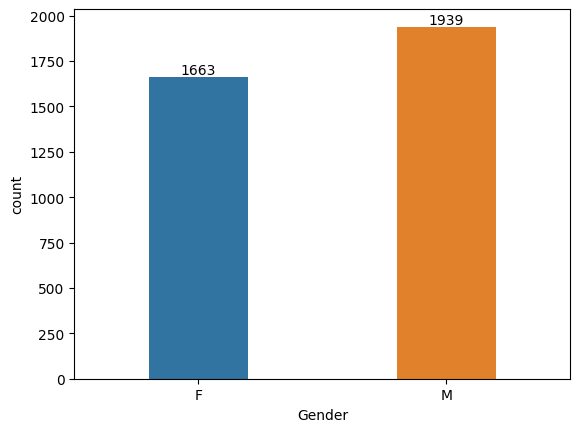

In [10]:
ax = sns.countplot(x='Gender', data=df, width=0.4)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graph, Number of Male Students are higher*

### Number of Students to 1st and 2nd Subject Choice

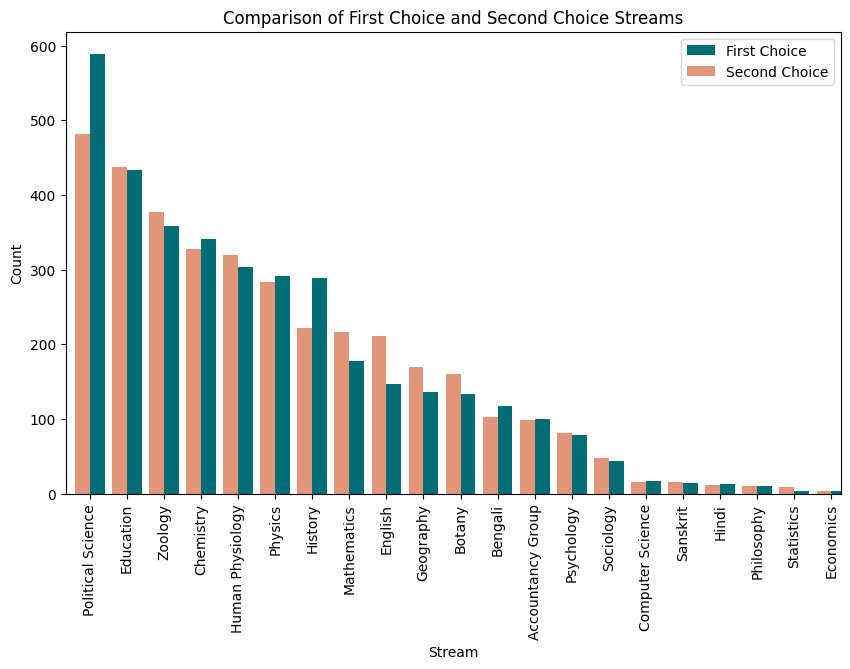

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first_choice_stream counts
df['1st Subject'].value_counts().plot(kind='bar', ax=ax, color='#006d77', position=0, width=0.4, label='First Choice')

# Plot the second_choice_stream counts
df['2nd Subject'].value_counts().plot(kind='bar', ax=ax, color='#e29578', position=1, width=0.4, label='Second Choice')

# Set labels and title
ax.set_xlabel('Stream')
ax.set_ylabel('Count')
ax.set_title('Comparison of First Choice and Second Choice Streams')
ax.legend()  # Show legend

plt.show()

*From above graph, Total number of students enrolled to Political Science is the highest as both 1st and 2nd Choice.*

### Percentage of students by Category

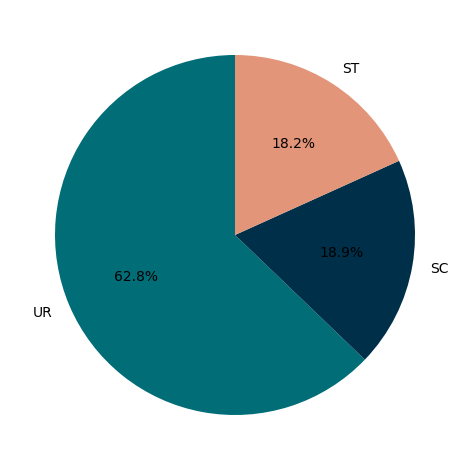

In [12]:
category=df['Category'].value_counts().reset_index()
category
colors=['#006d77','#003049','#e29578','#fcbf49']

# Create a bar chart for maximum choice by category
plt.pie(data=category,x=category['count'],autopct='%1.1f%%',labels=category['Category'], colors=colors, startangle=90)
plt.tight_layout()
plt.show()

*From above graph, The Upper Reserved candidates are the highest.*

### Number of Students according to Minority Status

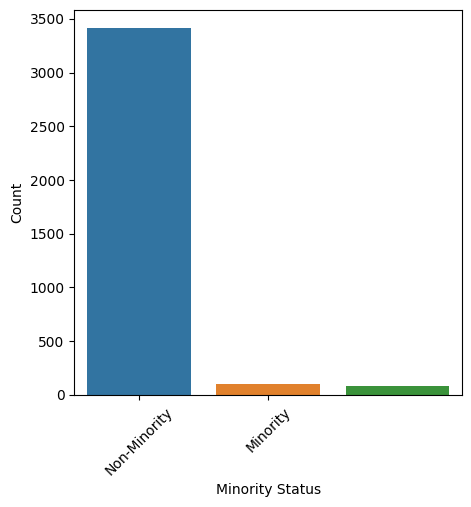

In [13]:
minority_counts = df['Minority'].value_counts()

# Plotting the distribution of minority status
plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Minority')
plt.xlabel('Minority Status')
plt.ylabel('Count')
#plt.title('Distribution of Minority Status')
plt.xticks(ticks=[0, 1], labels=['Non-Minority', 'Minority'], rotation=45)
plt.show()

*From Above Graph, The number of Non-Minority is the hightest*

### Academic Performance by Minority Status

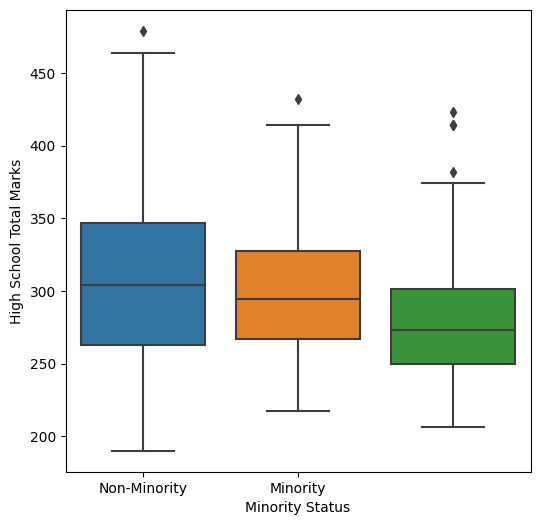

In [14]:
# Compare academic performance or other factors between minority and non-minority groups
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Minority', y='High School Total Marks')
plt.xlabel('Minority Status')
plt.ylabel('High School Total Marks')
#plt.title('Comparison of High School Total Marks between Minority and Non-Minority Groups')
plt.xticks(ticks=[0, 1], labels=['Non-Minority', 'Minority'])
plt.show()

# You can perform similar analysis for other factors such as gender, first_choice_marks, etc.

*From above graph, Total marks of Students are in Non-Minority students have better marks.*

### Number of Students Passout Years

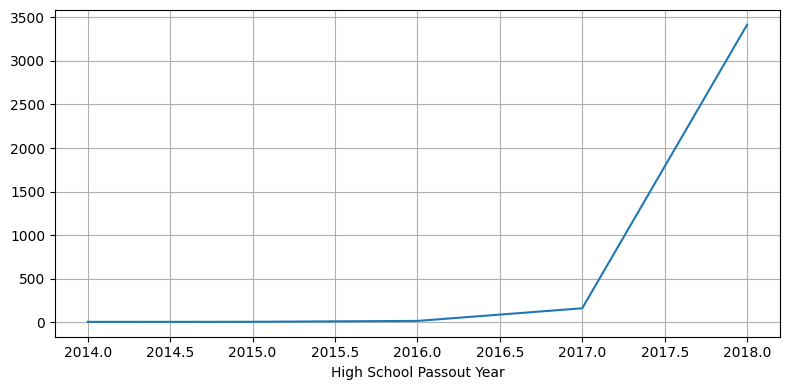

In [15]:
df['High School Passout Year'].value_counts().plot(kind='line',figsize=(8,4))
plt.tight_layout()
plt.grid(True)
plt.show()

*From above graph, the number of students in passout year 2018 is the hightest*